In [7]:
#导入sklearn.ensemble.RandomForestClassifier, train_test_split, matplotlib, numpy, pandas模块
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
datas = pd.read_csv(r'E:\other\doing_data_science-master\doing_data_science-master\doing_data_science-master\dds_datasets\dds_datasets\dds_ch2_nyt\nyt1.csv')
data = datas.drop(index=datas[datas.Signed_In==0].index)
data = data.drop(["Signed_In"], axis=1)
X, y = data.loc[:, ["Age", "Gender", "Impressions"]], data.loc[:, "Clicks"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [10]:
trees = RandomForestClassifier(n_estimators=1000, random_state=0).fit(X_train, y_train)
# 模型评估
print("Training set score: {:.3f}".format(trees.score(X_train, y_train)))
print("Test set score: {:.3f}".format(trees.score(X_test, y_test)))

Training set score: 0.932
Test set score: 0.931


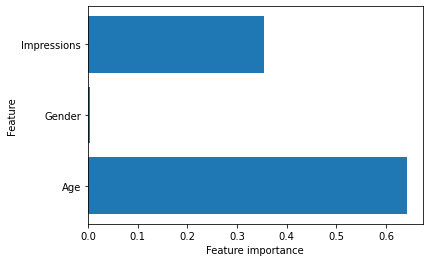

In [12]:
#特征重要性可视化
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(trees)